# Teste com árvore de decisão no dataset básico de razão de autovalores

Esse jupyter é só pra verificar se as árvores conseguem enxergar o threshold daquela razão de autovalores da matriz R do Kapetanovic em função de qtd de antenas, símbolos na sequência piloto e tal...

Um dataset foi criado com os seguintes atributos:

**qtdUsuarios:** FEATURE

**qtdAntenas:** FEATURE

**qtdSimbolos:** FEATURE

**snr:** FEATURE

**razaoAutovalores:** FEATURE (PRINCIPAL) 

**potenciaEspiao_TARGET:** TARGET (não precisa mas vamos deixar ele ai caso a gnt queira mexer com regressão depois)

**ataquePresente_TARGET:** TARGET (PRINCIPAL)

## Importações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
#DEFININDO ALGUNS PARÂMETROS DO GRÁFICO
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {
    'figure.figsize': [5, 2.5], 
    'axes.labelsize': 14,
    'axes.titlesize':16, 
    'font.size': 14,
    'legend.fontsize': 10, 
    'xtick.labelsize': 10, 
    'ytick.labelsize': 10,
    'axes.axisbelow': True
}
plt.rcParams.update(params)

## Definição de Funções

### Função para abrir o CSV e retornar data e target

Ainda pode-se aplicar um filtro enviando a qtd de usuários desejada e a snr mínima.

In [3]:
def obterDados(caminhoCSV, qtdMaxUsuarios=None, snrMinima=None):
    
    # ABRO O CSV
    datasetCSV = pd.read_csv(caminhoCSV)

    # FILTROS DO TIPO AND
    if qtdMaxUsuarios != None:
        datasetCSV = datasetCSV.loc[(datasetCSV['qtdUsuarios'] <= qtdMaxUsuarios)]
    if snrMinima != None:
        datasetCSV = datasetCSV.loc[(datasetCSV['snr'] >= snrMinima)]

    # SEPARANDO DATA E TARGET
    data   = datasetCSV[datasetCSV.columns[:-2]].to_numpy()
    target = datasetCSV[datasetCSV.columns[-1]].to_numpy()
    
    # RETORNO OS DADOS
    return data, target

### Funçao para rodar um bootstrap cross validation e retornar a soma das matrizes de confusão

In [4]:
def classificar(data, target, classificador, qtdHoldouts, percentualTreinamento):

    # SOMAR A MATRIZ DE CONFUSAO DE CADA ITERACAO
    matrizesConfusaoSomadas = np.array([[0,0],[0,0]])

    # PARA CADA HOLDOUT
    for i in range(qtdHoldouts):

        # SEPARANDO OS DADOS ALEATORIAMENTE
        xTrain, xTest, yTrain, yTest = train_test_split(data, target, train_size=percentualTreinamento)

        # TREINANDO O CLASSIFICADOR
        objClassificador = eval(classificador)
        objClassificador.fit(xTrain, yTrain)

        # PREDIZENDO OS DE TESTE
        yPred = objClassificador.predict(xTest)

        # MATRIZ DE CONFUSAO
        matrizesConfusaoSomadas += confusion_matrix(yTest, yPred)
        
    return matrizesConfusaoSomadas

### Função pra printar as métricas

In [5]:
def printar(matrizesConfusaoSomadas):
    
    print("Acurácia:", (matrizesConfusaoSomadas[0][0]+matrizesConfusaoSomadas[1][1])/np.sum(matrizesConfusaoSomadas))

    plt.imshow(matrizesConfusaoSomadas, cmap="gray")

    for (j,i), total in np.ndenumerate(matrizesConfusaoSomadas):
        plt.text(i, j, total, ha="center", va="center", color="tab:red")

    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.xticks([0,1], ["Normal", "Ataque"])
    plt.yticks([0,1], ["Normal", "Ataque"], rotation=90)
    plt.show()

## Parâmetros Iniciais

In [6]:
# CAMINHO PRO CSV
caminhoCSV            = "../CSV/dataset_1598983112.5778513.csv"

# PARAMETROS DO BOOTSTRAP
qtdHoldouts           = 5
percentualTreinamento = 0.75

# CLASSIFICADOR DESEJADO
classificador         = "RandomForestClassifier(n_estimators=10)"

# COMEÇANDO OS TESTES

Vamos começar bem facinho, com só 1 usuário conectado e SNR mínima bem alta. Aos poucos a gnt vai incrementando.

## Até 1 Usuário e SNR a partir de 30 dB

Acurácia: 0.9625933014354067


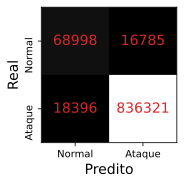

In [7]:
qtdMaxUsuarios = 1
snrMinima      = 30

data, target = obterDados(caminhoCSV, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

## Até 1 Usuário e SNR a partir de 0 dB

Acurácia: 0.9626944634313055


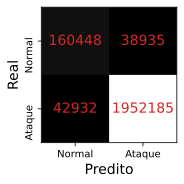

In [8]:
qtdMaxUsuarios = 1
snrMinima      = 0

data, target = obterDados(caminhoCSV, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

## Até 1 Usuário e todas as SNRs

Acurácia: 0.941424387414818


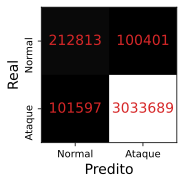

In [9]:
qtdMaxUsuarios = 1
snrMinima      = None

data, target = obterDados(caminhoCSV, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

## Até 2 Usuários e SNR a partir de 30 dB

Acurácia: 0.9310563530037215


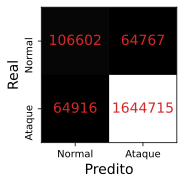

In [10]:
qtdMaxUsuarios = 2
snrMinima      = 30

data, target = obterDados(caminhoCSV, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

## Até 2 Usuários e todas as SNRs

Acurácia: 0.9169437436566623


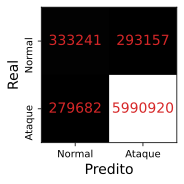

In [11]:
qtdMaxUsuarios = 2
snrMinima      = None

data, target = obterDados(caminhoCSV, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

## Máximo possível de usuários conectados e todas as SNRs

Acurácia: 0.9058809144072302


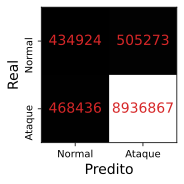

In [12]:
qtdMaxUsuarios = None
snrMinima      = None

data, target = obterDados(caminhoCSV, qtdMaxUsuarios, snrMinima)
matrizesConfusaoSomadas = classificar(data, target, classificador, qtdHoldouts, percentualTreinamento)
printar(matrizesConfusaoSomadas)

In [13]:
del data, target